In [29]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re

%matplotlib inline

## Generate Data for Relevant PDBs

In [8]:
! python solvent_accessibility.py

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 5r7y downloaded (5r7y.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2698 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 5r7z downloaded (5r7z.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2707 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 5r80 downloaded (5r80.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2703 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 5r81 downloaded (5r81.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2712 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 5r82 downloaded (5r82.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2706 atoms and 1 coordinate set(s) were parsed in 0.04s.


## Determine Proper Threshold for Relative Solvent Accessible Surface Areas

In [15]:
! ls output | head

5r7y_SA.csv
5r7z_SA.csv
5r80_SA.csv
5r81_SA.csv
5r82_SA.csv
5r83_SA.csv
5r84_SA.csv
5re4_SA.csv
5re5_SA.csv
5re6_SA.csv


In [27]:
sa_file_list = glob.glob('output/*_SA.csv')

pdb_id_list, sa_list = [], []
for fil in sa_file_list:
    pdb_id = re.search(r"""output\/(\w{4})_SA.csv""", fil).group(1)
    sa_df = pd.read_csv(fil)
    sa_df['pdb_id'] = pdb_id
    sa_list.append(sa_df)
    
sa_data = pd.concat(sa_list, axis=0)

In [31]:
sa_data.head()

,ResidueNumber,ResidueName,SolventAcessibleArea,RelativeAccessibleArea,pdb_id
0,0,SER,151.0,1.313043,5r7z
1,1,GLY,54.0,0.720000,5r7z
2,2,PHE,22.0,0.104762,5r7z
3,3,ARG,192.0,0.853333,5r7z
4,4,LYS,84.0,0.420000,5r7z


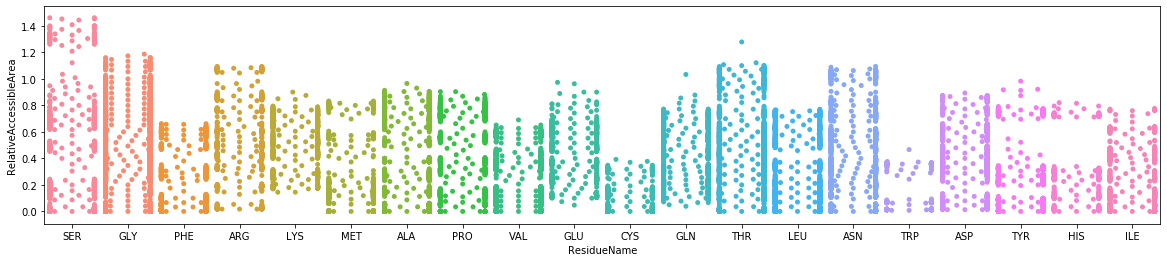

In [40]:
ax = sns.swarmplot(x='ResidueName', y='RelativeAccessibleArea', data=sa_data)
fig = plt.gcf()
fig.set_size_inches((20, 4))